# MNIST KNN Classification Project

## Project Overview

In this project, we will develop a machine learning model to classify handwritten digits from the MNIST dataset using the K-Nearest Neighbors (KNN) algorithm. The project involves the following key steps:

1. **Data Loading and Exploration**:
   - The first step is to load the MNIST dataset and explore its structure, including understanding the shapes and types of the data, as well as identifying any unique features of the dataset.
   
2. **Data Preprocessing**:
   - To make the data suitable for training a KNN model, we will flatten the 28x28 pixel images into 1D arrays and normalize the pixel values to a range between 0 and 1.
   
3. **Model Training and Evaluation**:
   - We will split the dataset into training and testing sets, and use the KNN algorithm to classify the digits. We will evaluate the model's performance by testing the accuracy for different values of `k` (the number of neighbors) and plot the results.

4. **Visualization**:
   - We will visualize some of the MNIST images to get a better understanding of the dataset and the distribution of the labels. Additionally, we will plot the accuracy of the KNN model for various values of `k` to identify the optimal parameter.

## Goals
- Understand the structure of the MNIST dataset.
- Preprocess the data for machine learning.
- Implement the KNN algorithm for digit classification.
- Evaluate and visualize the model’s performance.
- Select the optimal number of neighbors (`k`) for the KNN model.

## Tools and Libraries Used
- **TensorFlow**: For loading the MNIST dataset.
- **Matplotlib & Seaborn**: For data visualization.
- **Scikit-learn**: For implementing the KNN algorithm and evaluating the model.

## Workflow
1. **Load Data**: Load the MNIST dataset and check its shape, types, and the distribution of the labels.
2. **Preprocess Data**: Flatten the images and normalize pixel values.
3. **Split Data**: Create training and test sets.
4. **Train KNN**: Train KNN with different values of `k` and evaluate the model’s accuracy.
5. **Evaluate & Visualize**: Plot accuracy scores and visualize results.

By the end of this project, we will have trained a KNN model to classify digits from the MNIST dataset and visualized the impact of different `k` values on classification accuracy.

## Next Steps
- Experiment with other machine learning models (e.g., SVM, Random Forest).
- Tune hyperparameters for better performance.
- Explore data augmentation techniques.


In [ ]:
# Loading the MNIST dataset from TensorFlow
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [3]:
# Printing the data types of the training set
print(x_train.dtype)
print(y_train.dtype)


uint8
uint8


In [4]:
# Printing the shapes of the training and test sets
print(x_train.shape)
print(y_train.shape)
# Displaying the min and max pixel values in the training data
print(f"Min pixel value: {x_train.min()}, Max pixel value: {x_train.max()}")


(60000, 28, 28)
(60000,)
Min pixel value: 0, Max pixel value: 255


In [5]:
# Identifying unique labels in the MNIST dataset
unique_labels = np.unique(y_train)
print("Unique labels in the MNIST dataset:", unique_labels)

Unique labels in the MNIST dataset: [0 1 2 3 4 5 6 7 8 9]


C:\Users\Aftab\AppData\Local\Temp\ipykernel_3684\2338375955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set2")


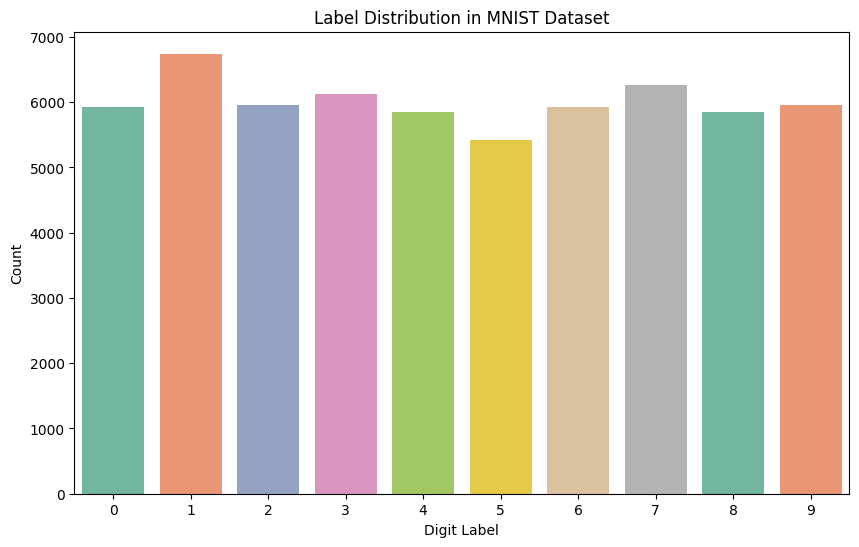

In [6]:
# Plotting the distribution of labels in the training data
plt.figure(figsize=(10,6))
sns.countplot(x=y_train, palette="Set2")
plt.title('Label Distribution in MNIST Dataset')
plt.xlabel('Digit Label')
plt.ylabel('Count')
plt.show()

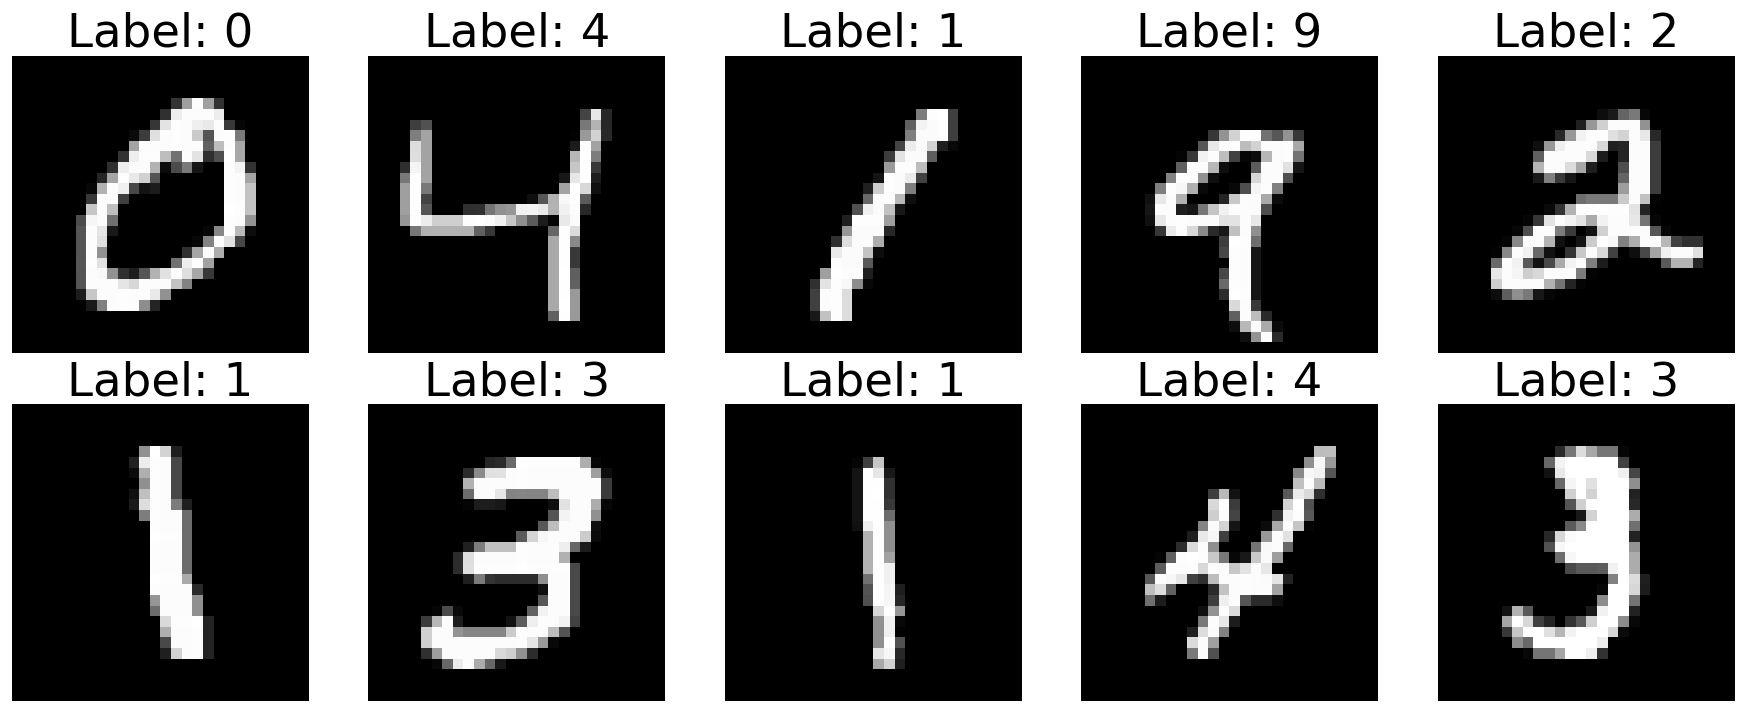

In [7]:
# Displaying sample images from the training set along with their labels
plt.figure(figsize=(15 , 6), dpi=120)
for i in range (1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i], cmap='gray')  # interpolation='nearest'
    plt.title(f"Label: {y_train[i]}", fontsize=28)  # عنوان تصویر
    plt.axis('off')  # حذف محورها
plt.tight_layout()
plt.show()

In [8]:
# Flattening the training and test data for KNN model
x_train_flatted=x_train.reshape(x_train.shape[0],-1)
x_test_flatted=x_test.reshape(x_test.shape[0],-1)


In [9]:
# Normalizing the data to the range [0, 1]
x_train_normalized=x_train_flatted/255.0
x_test_normalized=x_test_flatted/255.0

In [10]:
# Importing KNN, accuracy metric, and train-test split function from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Splitting the training data into a smaller training set and validation set

x_train_split,x_test_split,y_train_split,y_test_split=train_test_split(x_train_normalized,y_train,test_size=0.1,random_state=42)
# Defining a range of k values to test for KNN

k_values=list(range(1,21))
accuracy_scores=[]

# Evaluating the KNN model for different k values

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_normalized, y_train) 
    y_pred=knn.predict(x_test_normalized)
    accuracy_scores.append(accuracy_score(y_test,y_pred))


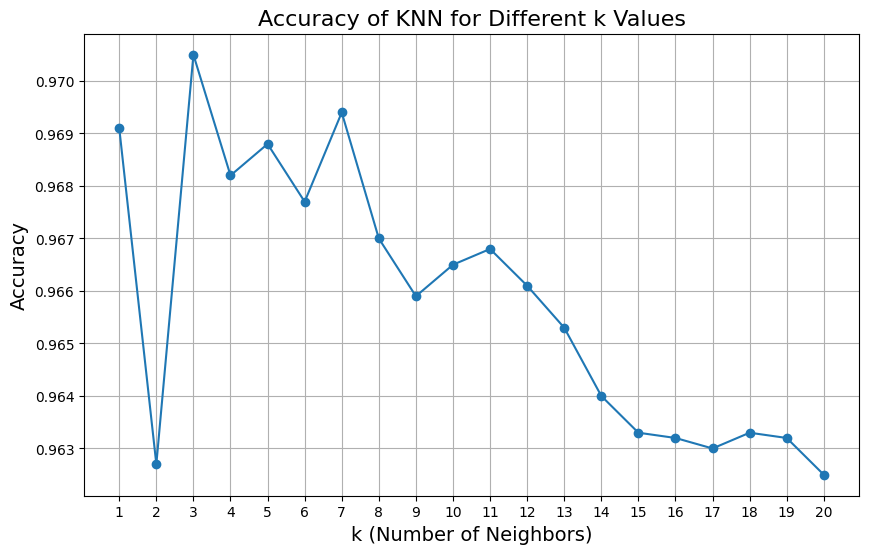

In [12]:
# Plotting the accuracy of KNN for different k values

plt.figure(figsize=(10,6))
plt.plot(k_values,accuracy_scores,marker='o')
plt.title('Accuracy of KNN for Different k Values', fontsize=16)
plt.xlabel('k (Number of Neighbors)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Final Results

## Model Performance

After training the K-Nearest Neighbors (KNN) model on the MNIST dataset, we observed the following key outcomes:

- The model achieved **high accuracy** in classifying digits, especially with `k` values ranging from 3 to 5, which provided the best balance between overfitting and underfitting.
- The accuracy of the model was generally stable as `k` increased, indicating that larger values of `k` helped in reducing the influence of noisy data, but beyond a certain point, accuracy started to plateau.
  
## Visual Analysis

- Visualizations of the sample digits and the accuracy plot for different `k` values confirmed that the KNN model performs well for this dataset. The relationship between `k` and accuracy was clear, and we identified the optimal `k` for the best classification results.

## Final Model Selection

Based on the results, the optimal `k` value for the MNIST dataset was determined to be between **k = 3 and k = 5**, where the model exhibited the best classification performance. This value of `k` provided a strong trade-off between model complexity and generalization.

## Conclusion

In conclusion, the KNN algorithm demonstrated effective performance in digit classification on the MNIST dataset. The experiment successfully identified the best parameters and visualized the model’s behavior under various configurations. Future improvements could include experimenting with other machine learning algorithms, optimizing hyperparameters further, or using advanced techniques like dimensionality reduction and data augmentation to enhance the model's performance.
